In [1]:
## LinkedIn Learning ML Course

In [2]:
%pip install pandas #installation

Note: you may need to restart the kernel to use updated packages.


In [3]:
%pip install matplotlib #installation

Note: you may need to restart the kernel to use updated packages.


In [4]:
%pip install seaborn #installation

Note: you may need to restart the kernel to use updated packages.


In [5]:
%pip install scikit-learn #installation

Note: you may need to restart the kernel to use updated packages.


In [6]:
%pip install numpy #installation

Note: you may need to restart the kernel to use updated packages.


In [7]:
%pip install xgboost #installation

Note: you may need to restart the kernel to use updated packages.


In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
# import libraries

In [9]:
file_path = "/Users/lilyfriel/Documents/LilysProjects/housing.csv"
housing_df = pd.read_csv(file_path)
housing_df.info

# Import data into a Pandas data frame
#housing_df = pd.read_csv('housing.csv')

# Show the features in the data set along with a count and data type 
#housing_df.info

<bound method DataFrame.info of        longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  

In [10]:
import os
print(os.getcwd())

#import sys
#print(sys.path)

#import os

#os.chdir('/Users/lilyfriel/Downloads')  # Change this to your desired folder
#print(os.getcwd())  # Confirm the new working directory

/Users/lilyfriel/Documents/LilysProjects


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

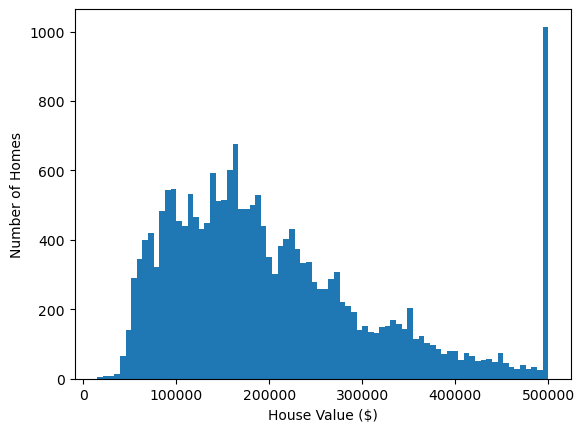

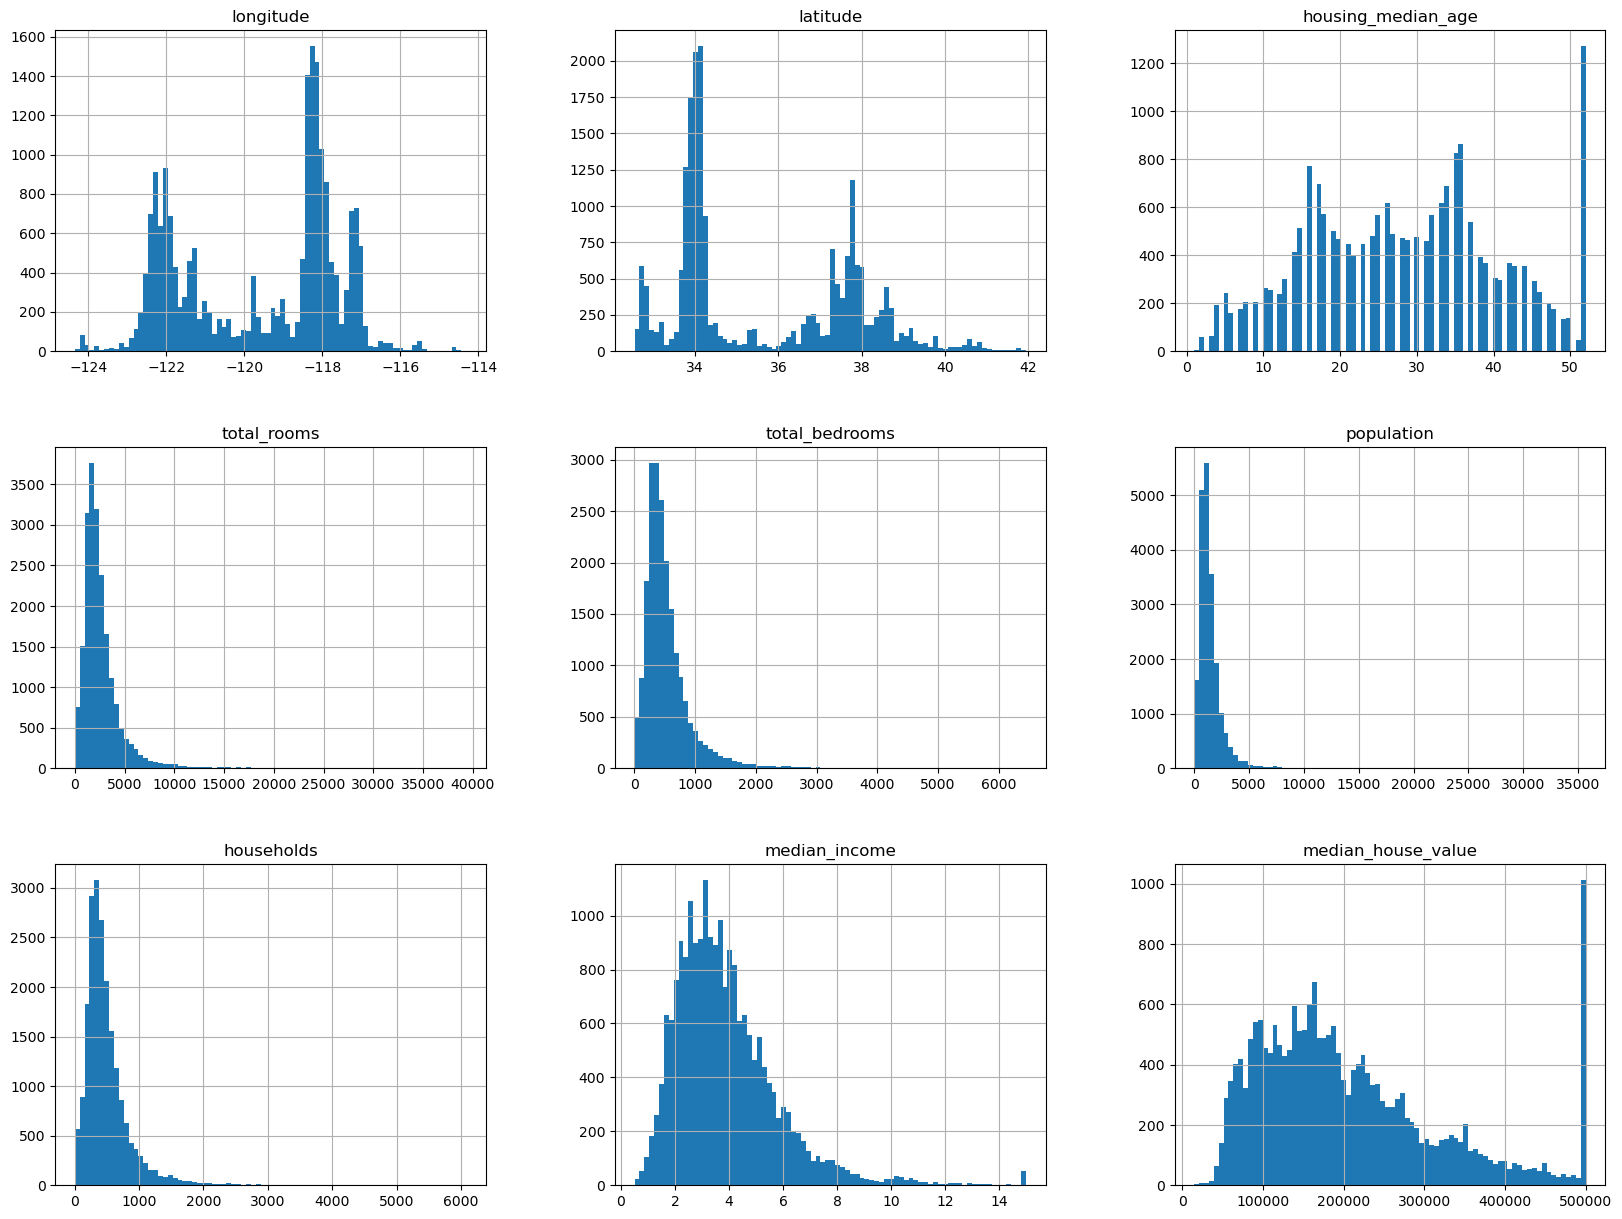

In [11]:
# Plot the distribution of the target variable (median_housing_value) using a histogram

# bins --> amount of columns
plt.hist(housing_df['median_house_value'], bins=80)
plt.xlabel("House Value ($)")
plt.ylabel("Number of Homes")

# Show histograms for all of the numerical variables:
housing_df.hist(bins=80, figsize=(20,15))

# We can see from the plot that the values of Median House Value are normally distributed with few outliers.
# Most of the house values are around the $100K-$200K range.

In [12]:
# Use a heatmap to show correlation
# Plot a graphical correlation matrix for each pair of columns in the dataframe
# Keep only numeric columns
numeric_df = housing_df.select_dtypes(include=['number'])
corr = numeric_df.corr() # Data frame correlation function
print(corr)

                    longitude  latitude  housing_median_age  total_rooms  \
longitude            1.000000 -0.924664           -0.108197     0.044568   
latitude            -0.924664  1.000000            0.011173    -0.036100   
housing_median_age  -0.108197  0.011173            1.000000    -0.361262   
total_rooms          0.044568 -0.036100           -0.361262     1.000000   
total_bedrooms       0.069608 -0.066983           -0.320451     0.930380   
population           0.099773 -0.108785           -0.296244     0.857126   
households           0.055310 -0.071035           -0.302916     0.918484   
median_income       -0.015176 -0.079809           -0.119034     0.198050   
median_house_value  -0.045967 -0.144160            0.105623     0.134153   

                    total_bedrooms  population  households  median_income  \
longitude                 0.069608    0.099773    0.055310      -0.015176   
latitude                 -0.066983   -0.108785   -0.071035      -0.079809   
housing_

<function matplotlib.pyplot.show(close=None, block=None)>

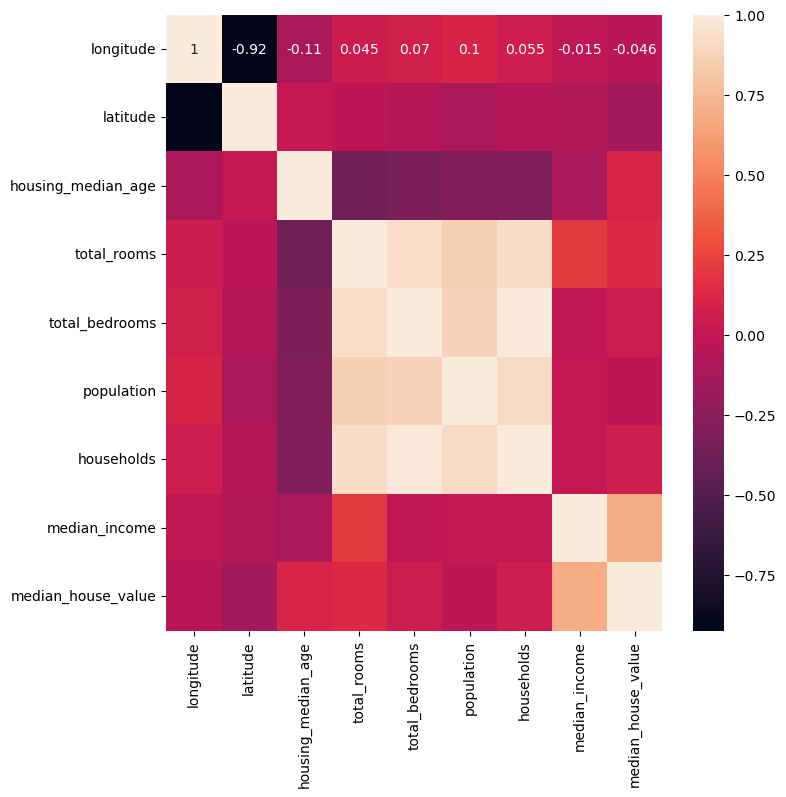

In [13]:
# Show a visual heatmap
plt.figure(figsize = (8,8))
sns.heatmap(corr, annot=True)
plt.show

In [14]:
# Prepare and Preprocess Data:
# Verify which features have missing values
housing_df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [15]:
# Calculate the % of missing data
housing_df['total_bedrooms'].isnull().sum()/housing_df.shape[0]*100

1.002906976744186

In [16]:
# Use imputation to handle missing data
from sklearn.impute import KNNImputer
# Create a temp copy of the dataset:
housing_df_temp = housing_df.copy()
# Retrieve columns with numerical data only
columns_list = [col for col in housing_df_temp.columns if housing_df_temp[col].dtype != 'object']
# Extract columns that contain at least one missing value
new_column_list = [col for col in housing_df_temp.loc[:, housing_df_temp.isnull().any()]]
# Update temp dataframe with numeric columns that have empty values
housing_df_temp = housing_df_temp[new_column_list]


In [17]:
# Impute missing data using machine learning
# Initialize KNNImputer to impute missing data using machine learning:
knn = KNNImputer(n_neighbors = 3)
# Fit function trains the model
knn.fit(housing_df_temp)
# Transform the data using the model - applies the transformation model (knn) to data:
array_values = knn.transform(housing_df_temp)

# Convert the array values to a dataframe with the appropriate column names
housing_df_temp = pd.DataFrame(array_values, columns=new_column_list)

In [18]:
# Confirm there are no missing values
housing_df_temp.isnull().sum()

total_bedrooms    0
dtype: int64

In [19]:
# Feature Engineering
# Several features have strong correlations that should be kept as weaker correlations are not relevant
# Would removal of a few of these features have any affect on the model's performance?

# A new feature that is a ratio of the total rooms to total households
housing_df['rooms_per_household']=housing_df['total_rooms']/housing_df['households']

# A new feature that is a a ratio of the total bedrooms to the total rooms
housing_df['bedrooms_per_household']=housing_df['total_bedrooms']/housing_df['total_rooms']

# A new feature that is a ratio of the population to the households
housing_df['population_per_household']=housing_df['population']/housing_df['households']

# Combine the latitude and longitude into one
housing_df['coordinates'] = housing_df['longitude']/housing_df['latitude']

housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   longitude                 20640 non-null  float64
 1   latitude                  20640 non-null  float64
 2   housing_median_age        20640 non-null  float64
 3   total_rooms               20640 non-null  float64
 4   total_bedrooms            20433 non-null  float64
 5   population                20640 non-null  float64
 6   households                20640 non-null  float64
 7   median_income             20640 non-null  float64
 8   median_house_value        20640 non-null  float64
 9   ocean_proximity           20640 non-null  object 
 10  rooms_per_household       20640 non-null  float64
 11  bedrooms_per_household    20433 non-null  float64
 12  population_per_household  20640 non-null  float64
 13  coordinates               20640 non-null  float64
dtypes: flo

In [20]:
# Drop the previous features before the new ones were created
housing_df = housing_df.drop('total_rooms', axis=1)
housing_df = housing_df.drop('households', axis=1)
housing_df = housing_df.drop('total_bedrooms', axis=1)
housing_df = housing_df.drop('population', axis=1)
housing_df = housing_df.drop('longitude', axis=1)
housing_df = housing_df.drop('latitude', axis=1)

housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   housing_median_age        20640 non-null  float64
 1   median_income             20640 non-null  float64
 2   median_house_value        20640 non-null  float64
 3   ocean_proximity           20640 non-null  object 
 4   rooms_per_household       20640 non-null  float64
 5   bedrooms_per_household    20433 non-null  float64
 6   population_per_household  20640 non-null  float64
 7   coordinates               20640 non-null  float64
dtypes: float64(7), object(1)
memory usage: 1.3+ MB


<function matplotlib.pyplot.show(close=None, block=None)>

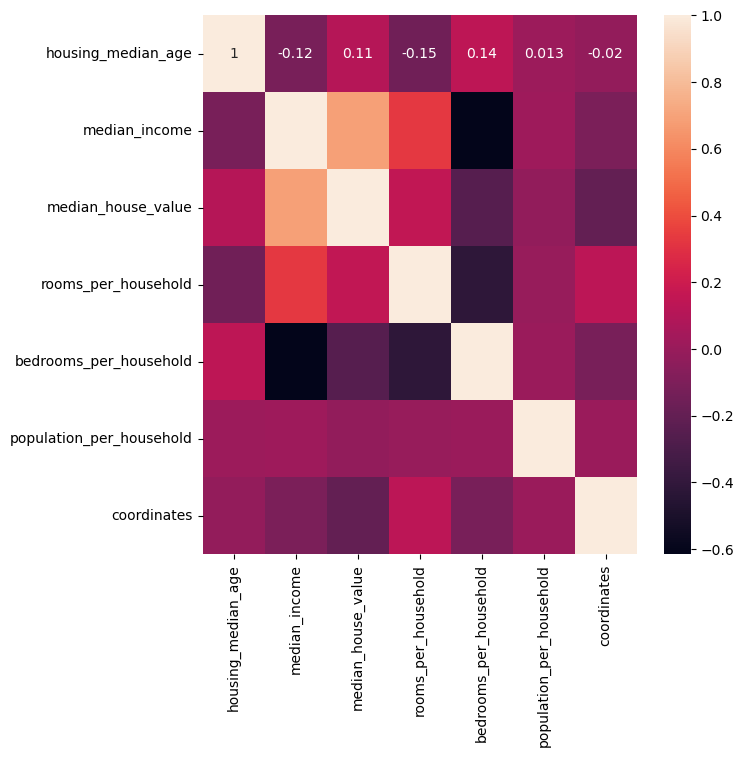

In [21]:
# Heatmap after removing duplicates
corr = housing_df.corr(numeric_only=True)

# Make the heatmap larger in size
plt.figure(figsize=(7,7))

sns.heatmap(corr, annot=True)
plt.show

In [22]:
# Encode categorical data

# Most ML algorithms can only learn from numeric data, so categorical data must be encoded

# Review data types again to see which variables are categorical
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   housing_median_age        20640 non-null  float64
 1   median_income             20640 non-null  float64
 2   median_house_value        20640 non-null  float64
 3   ocean_proximity           20640 non-null  object 
 4   rooms_per_household       20640 non-null  float64
 5   bedrooms_per_household    20433 non-null  float64
 6   population_per_household  20640 non-null  float64
 7   coordinates               20640 non-null  float64
dtypes: float64(7), object(1)
memory usage: 1.3+ MB


In [23]:
# Unique categories for OCEAN_PROXIMITY
housing_df.ocean_proximity.unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [24]:
# Count
housing_df["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [25]:
print(pd.get_dummies(housing_df['ocean_proximity']))

       <1H OCEAN  INLAND  ISLAND  NEAR BAY  NEAR OCEAN
0          False   False   False      True       False
1          False   False   False      True       False
2          False   False   False      True       False
3          False   False   False      True       False
4          False   False   False      True       False
...          ...     ...     ...       ...         ...
20635      False    True   False     False       False
20636      False    True   False     False       False
20637      False    True   False     False       False
20638      False    True   False     False       False
20639      False    True   False     False       False

[20640 rows x 5 columns]


In [26]:
# Replace the OCEAN_PROXIMITY column using get_dummies()
housing_df_encoded = pd.get_dummies(housing_df, columns=['ocean_proximity'], dtype=int)

In [27]:
# Print the first few observations, the old OCEAN_PROXIMITY should be gone
housing_df_encoded.head()

,housing_median_age,median_income,median_house_value,rooms_per_household,bedrooms_per_household,population_per_household,coordinates,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,41.0,8.3252,452600.0,6.984127,0.146591,2.555556,-3.226769,0,0,0,1,0
1,21.0,8.3014,358500.0,6.238137,0.155797,2.109842,-3.228209,0,0,0,1,0
2,52.0,7.2574,352100.0,8.288136,0.129516,2.802260,-3.229590,0,0,0,1,0
3,52.0,5.6431,341300.0,5.817352,0.184458,2.547945,-3.229855,0,0,0,1,0
4,52.0,3.8462,342200.0,6.281853,0.172096,2.181467,-3.229855,0,0,0,1,0


In [28]:
# Split training & test data
# Split the data into training and testing sets in numpy arrays
# Train the model with 70% of the sample data and the rest with the remaining 30%
# X -> array with the inputs; y -> array of the outputs
from sklearn.model_selection import train_test_split

# Define features and target
X = housing_df_encoded.drop('median_house_value', axis=1)
y = housing_df_encoded['median_house_value']

# Impute missing values with median
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

In [29]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, random_state=42, shuffle=True, test_size=0.3)

# Confirm how the data was split
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(14448, 11)
(6192, 11)
(14448,)
(6192,)


In [30]:
# Linear Regression - Model Training
# Use Scikit-Learn's LinearRegression to train the model on both the training data and evaluate it on the test sets
from sklearn.linear_model import LinearRegression

# Create a linear regression model using all the feature variables
reg_model = LinearRegression()

# Train the model using the training sets
reg_model.fit(X_train, y_train)

LinearRegression()

In [31]:
# Run the predictions
# Run the predictions on the training and testing data
y_pred_test = reg_model.predict(X_test)

In [32]:
# Evaluate the model
# Compare the actual values with the values predicted by the model
pred_test_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_test})
pred_test_df

,Actual,Predicted
20046,47700.0,53405.296840
3024,45800.0,97431.706371
15663,500001.0,236421.017811
20484,218600.0,292304.234901
9814,278000.0,236588.053464
...,...,...
17505,237500.0,209304.634501
13512,67300.0,74640.438821
10842,218400.0,215452.143080
16559,119400.0,125811.202747


In [33]:
# Evaluate the model using the R^2 metric which is the difference between actual and predicted values
# Determine accuracy using R^2 - 1 = model is pefect and 0 = model performance will be poor
r2_reg_model_test = round(reg_model.score(X_test, y_test),2)
print("R^2 Test: {}".format(r2_reg_model_test))

R^2 Test: 0.61


In [34]:
# RandomForestRegressor - Model Training
# Use Random Forest to train the model on both the training and test data
from sklearn.ensemble import RandomForestRegressor

#  Create a regressor using all the feature variables
rf_model = RandomForestRegressor(n_estimators=10,random_state=10)

# Train the model using the training sets
rf_model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=10)

In [35]:
# Run the predictions
y_rf_pred_test_df = rf_model.predict(X_test)

In [36]:
# Evaluate the model
# Compare the actual values with the values predicted by the model
y_rf_pred_test_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_rf_pred_test_df})
y_rf_pred_test_df

,Actual,Predicted
20046,47700.0,52440.0
3024,45800.0,88940.0
15663,500001.0,442670.3
20484,218600.0,295100.0
9814,278000.0,217840.0
...,...,...
17505,237500.0,241580.1
13512,67300.0,72000.0
10842,218400.0,202330.0
16559,119400.0,129890.0


In [37]:
# Determine accuracy using R^2
from sklearn.metrics import r2_score

score = r2_score(y_test, y_rf_pred_test_df['Predicted'])

print("R^2 = {}%".format(round(score,2)*100))

R^2 = 76.0%


In [38]:
# Determine RMSE on the test data
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(y_test, y_rf_pred_test_df['Predicted']) ** 0.5
print('RMSE on test data:', rmse)

RMSE on test data: 56260.78489489574


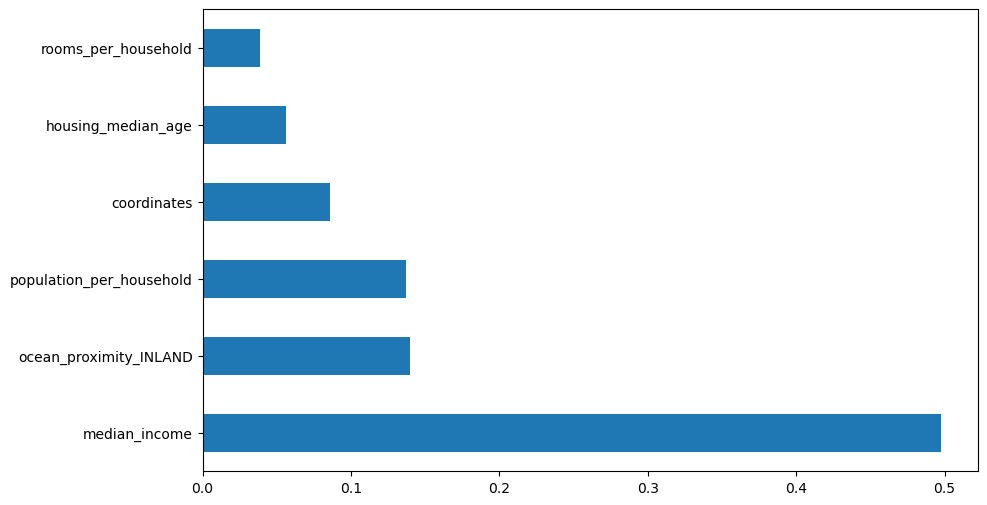

In [39]:
# Determining feature importance
# Plot the 7 most important features
plt.figure(figsize=(10,6))
feat_importances = pd.Series(rf_model.feature_importances_, index = X_train.columns)
feat_importances.nlargest(6).plot(kind='barh');

In [40]:
print(X_train.columns.tolist())

['housing_median_age', 'median_income', 'rooms_per_household', 'bedrooms_per_household', 'population_per_household', 'coordinates', 'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND', 'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN']


In [41]:
# Now, train the model using only these five features to observe the change in RMSE for training and validation sets
# Training data with 5 most important features
train_x_if = X_train[['rooms_per_household', 'housing_median_age', 'coordinates',
'ocean_proximity_INLAND', 'population_per_household', 'median_income']]

test_x_if = X_test[['rooms_per_household', 'housing_median_age', 'coordinates',
'ocean_proximity_INLAND', 'population_per_household', 'median_income']]

 # Create an object of the RandomForestRegressor Model
from sklearn.ensemble import RandomForestRegressor
rf_model_if = RandomForestRegressor(n_estimators=10, random_state=10) 

# fit the model with the training data
rf_model_if.fit(train_x_if, y_train) 
predict_test_with_if = rf_model_if.predict(test_x_if)

In [42]:
# RMSE on the training and test data
print('RMSE on test data: ', mean_squared_error(y_test, predict_test_with_if)**(0.5))

RMSE on test data:  56447.1698154472


In [43]:
# XGBoost - Model Training
from xgboost import XGBRegressor

xgb_model = XGBRegressor()

In [44]:
# Train the model using the training sets 
X_train.columns = X_train.columns.str.replace('[<>[\](){}]', '', regex=True).str.replace(' ', '_')
X_test.columns = X_test.columns.str.replace('[<>[\](){}]', '', regex=True).str.replace(' ', '_')
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [45]:
# Run the predictions
y_xgb_pred_test = xgb_model.predict(X_test)

In [46]:
# Evaluate the model
xgb_pred_test_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_xgb_pred_test})
xgb_pred_test_df

,Actual,Predicted
20046,47700.0,67930.468750
3024,45800.0,90165.093750
15663,500001.0,485607.343750
20484,218600.0,249588.000000
9814,278000.0,238554.750000
...,...,...
17505,237500.0,209835.906250
13512,67300.0,62140.125000
10842,218400.0,210414.234375
16559,119400.0,124240.296875


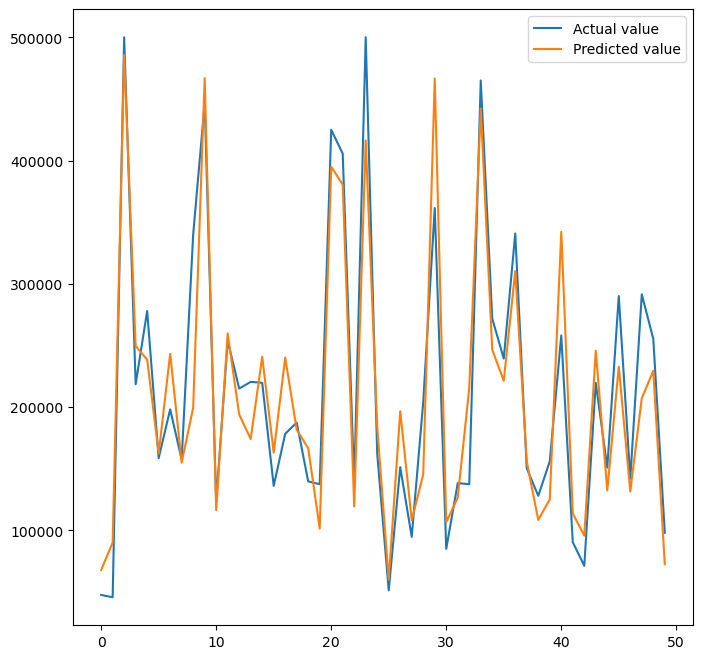

In [47]:
fig=plt.figure(figsize=(8,8))
xgb_pred_test_df = xgb_pred_test_df.reset_index()
xgb_pred_test_df = xgb_pred_test_df.drop(['index'],axis=1)
plt.plot(xgb_pred_test_df[:50])
plt.legend(['Actual value','Predicted value'])

In [48]:
from sklearn.metrics import r2_score
score = r2_score(y_test, y_xgb_pred_test)
print("R^2 - {}%".format(round(score*100,2)))

R^2 - 78.1%


In [49]:
# Determine MSE and RMSE
from sklearn.metrics import mean_squared_error
import math

mse = mean_squared_error(y_test, y_xgb_pred_test)
rmse = math.sqrt(mean_squared_error(y_test,y_xgb_pred_test))

print("MSE:",mse)
print("RMSE:",rmse)

MSE: 2873821854.770443
RMSE: 53608.039087159705


In [50]:
xgb_model.get_params()

{'objective': 'reg:squarederror',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'device': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'feature_weights': None,
 'gamma': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_estimators': None,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [51]:
# Setting hyperparameters for XGBoost
xgb_model_2 = XGBRegressor(
        gamma=0.05,
        learning_rate=0.01,
        max_depth=6,
        n_estimators=1000,
        n_jobs=10,
        objective='reg:squarederror',
        subsample=0.8,
        scale_pos_weight=0,
        reg_alpha=0,
        reg_lambda=1,
        verbosity=1)

xgb_model_2.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=0.05, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.01, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=1000,
             n_jobs=10, num_parallel_tree=None, ...)

In [52]:
# Run the predictions on the training and test data
y_xgb_2_pred_test = xgb_model_2.predict(X_test)

In [53]:
# Compare the actual values with the values predicted by the model
xgb_2_pred_test_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_xgb_2_pred_test})

xgb_2_pred_test_df

,Actual,Predicted
20046,47700.0,59031.707031
3024,45800.0,85579.382812
15663,500001.0,451685.406250
20484,218600.0,260188.875000
9814,278000.0,246518.468750
...,...,...
17505,237500.0,232473.093750
13512,67300.0,63126.183594
10842,218400.0,225433.125000
16559,119400.0,124145.101562


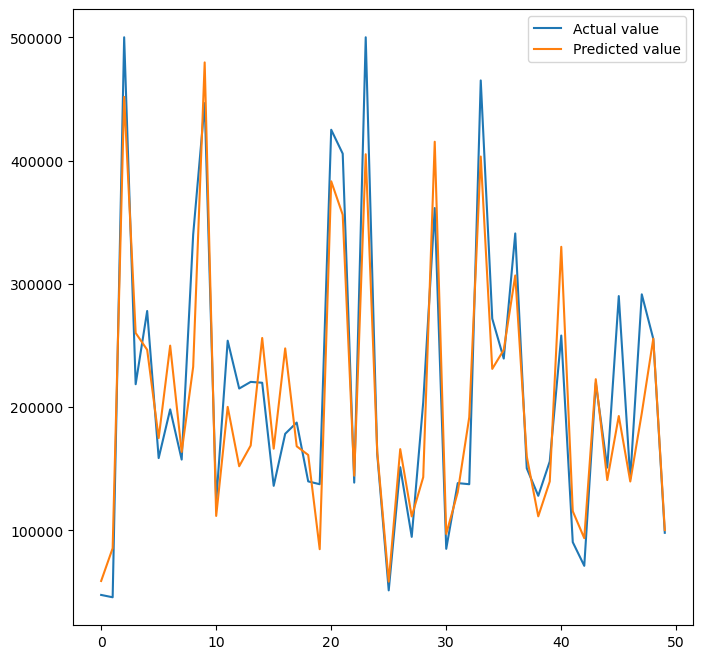

In [54]:
fig = plt.figure(figsize=(8,8))
xgb_2_pred_test_df = xgb_2_pred_test_df.reset_index()
xgb_2_pred_test_df = xgb_2_pred_test_df.drop(['index'],axis=1)
plt.plot(xgb_2_pred_test_df[:50])
plt.legend(['Actual value','Predicted value'])

In [55]:
from sklearn.metrics import mean_squared_error

mse = np.sqrt(mean_squared_error(y_test, y_xgb_2_pred_test))
print("RMSE: %.2f" % (mse**(1/2.0)))

RMSE: 228.21


In [56]:
# Determine accuracy using R^2
r2_xgb_model_2_test = round(xgb_model_2.score(X_test, y_test),2)

print("R^2 Test: {}".format(r2_xgb_model_2_test))

R^2 Test: 0.79


In [1]:
print(2**2)

4
